https://github.com/mhmodsrsor/igor-nor-ex1

1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [36]:

from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

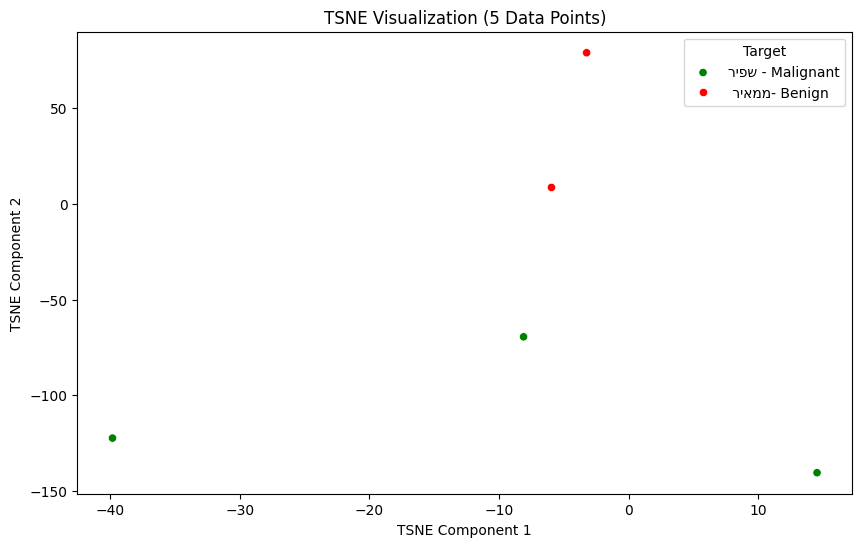

In [37]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset into a DataFrame
df = pd.DataFrame(my_data.data, columns=my_data.feature_names)
df['target'] = my_data.target

# Select only 5 data points (for simplicity)
df_sample = df.sample(5, random_state=42)

# TSNE visualization (using 2 dimensions)
tsne = TSNE(n_components=2, random_state=42, perplexity=2)  # perplexity קטן ממספר הדגימות
tsne_results = tsne.fit_transform(df_sample[my_data.feature_names])

# Add TSNE results to DataFrame
df_sample['TSNE_1'] = tsne_results[:, 0]
df_sample['TSNE_2'] = tsne_results[:, 1]

# Visualize TSNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='TSNE_1', y='TSNE_2',
    hue='target',
    palette={0: 'red', 1: 'green'},  # ממאיר באדום, שפיר בירוק
    data=df_sample
)
plt.title('TSNE Visualization (5 Data Points)')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Target', labels=['ריפש - Malignant', ' ריאממ- Benign'])
plt.show()


3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [38]:

from sklearn.model_selection import train_test_split

# X_train, X_test, Y_train, Y_test = train_test_split(...)
# Separate features (X) and target (Y)
X = my_data.data #  המאפיינים (features) מהדאטה
Y = my_data.target #התגיות (labels), כלומר אם הגידול ממאיר (0) או שפיר (1).

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.8,  # 80% of the data will be used for testing
    random_state=42  # Ensures reproducibility
)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")



X_train shape: (113, 30)
X_test shape: (456, 30)
Y_train shape: (113,)
Y_test shape: (456,)


4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Step 1: Create the model
model_decision_tree = DecisionTreeClassifier(
    criterion='entropy',      # קריטריון אנטרופיה
    max_depth=10,             # עומק מוגבל למניעת התאמת יתר
    min_samples_split=10,     # מינימום דוגמאות לפיצול
    min_samples_leaf=4,       # עלים עם מספר מינימלי גדול יותר
    random_state=42
)

# Step 2: Train the model
model_decision_tree.fit(X_train, Y_train)

# Step 3: Predict on train and test data
Y_train_pred = model_decision_tree.predict(X_train)
Y_test_pred = model_decision_tree.predict(X_test)

# Step 4: Evaluate the model
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Optional: Detailed evaluation
print("\nClassification Report (Test):")
print(classification_report(Y_test, Y_test_pred))
print("\nConfusion Matrix (Test):")
print(confusion_matrix(Y_test, Y_test_pred))


Train Accuracy: 0.97
Test Accuracy: 0.93

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       166
           1       0.98      0.90      0.94       290

    accuracy                           0.93       456
   macro avg       0.91      0.93      0.92       456
weighted avg       0.93      0.93      0.93       456


Confusion Matrix (Test):
[[160   6]
 [ 28 262]]


5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Create the RandomForestClassifier model
model_random_forest = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    max_features='log2',
    criterion='entropy' ,
    random_state=42
)

# Step 2: Train the model
model_random_forest.fit(X_train, Y_train)

# Step 3: Make predictions
Y_train_pred = model_random_forest.predict(X_train)
Y_test_pred = model_random_forest.predict(X_test)

# Step 4: Evaluate the model
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

print("\nClassification Report (Test):")
print(classification_report(Y_test, Y_test_pred))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(Y_test, Y_test_pred))


Train Accuracy: 0.99
Test Accuracy: 0.96

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       166
           1       0.98      0.97      0.97       290

    accuracy                           0.96       456
   macro avg       0.96      0.96      0.96       456
weighted avg       0.96      0.96      0.96       456


Confusion Matrix (Test):
[[159   7]
 [ 10 280]]


6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Create the AdaBoostClassifier model
model_adaboost =  AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # לומד חלש
    n_estimators=50,                               # יותר לומדים חלשים
    learning_rate=0.5,                              # קצב למידה נמוך
    algorithm='SAMME',                            # אלגוריתם SAMME.R
    random_state=42
)

# Step 2: Train the model
model_adaboost.fit(X_train, Y_train)

# Step 3: Make predictions
Y_train_pred = model_adaboost.predict(X_train)
Y_test_pred = model_adaboost.predict(X_test)

# Step 4: Evaluate the model
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

print("\nClassification Report (Test):")
print(classification_report(Y_test, Y_test_pred))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(Y_test, Y_test_pred))



Train Accuracy: 1.00
Test Accuracy: 0.96

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       166
           1       0.98      0.96      0.97       290

    accuracy                           0.96       456
   macro avg       0.95      0.96      0.96       456
weighted avg       0.96      0.96      0.96       456


Confusion Matrix (Test):
[[160   6]
 [ 12 278]]


7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# Function to evaluate a model
def evaluate_model(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    metrics = {
        "Accuracy": accuracy_score(Y_test, Y_pred),
        "Precision": precision_score(Y_test, Y_pred),
        "Recall": recall_score(Y_test, Y_pred),
        "F1-Score": f1_score(Y_test, Y_pred),
        "Confusion Matrix": confusion_matrix(Y_test, Y_pred)
    }
    return metrics

# Evaluate each model
results_decision_tree = evaluate_model(model_decision_tree, X_test, Y_test)
results_random_forest = evaluate_model(model_random_forest, X_test, Y_test)
results_adaboost = evaluate_model(model_adaboost, X_test, Y_test)

# Print results
print("Decision Tree Results:")
for metric, value in results_decision_tree.items():
    print(f"{metric}: {value}")
print("\nRandom Forest Results:")
for metric, value in results_random_forest.items():
    print(f"{metric}: {value}")
print("\nAdaBoost Results:")
for metric, value in results_adaboost.items():
    print(f"{metric}: {value}")

# Determine the winner based on F1-Score
f1_scores = {
    "Decision Tree": results_decision_tree["F1-Score"],
    "Random Forest": results_random_forest["F1-Score"],
    "AdaBoost": results_adaboost["F1-Score"]
}

winner = max(f1_scores, key=f1_scores.get)
print("\nWinner:")
print(f"The best classifier is: {winner} with an F1-Score of {f1_scores[winner]:.2f}")


Decision Tree Results:
Accuracy: 0.9254385964912281
Precision: 0.9776119402985075
Recall: 0.903448275862069
F1-Score: 0.9390681003584229
Confusion Matrix: [[160   6]
 [ 28 262]]

Random Forest Results:
Accuracy: 0.9429824561403509
Precision: 0.952054794520548
Recall: 0.9586206896551724
F1-Score: 0.9553264604810997
Confusion Matrix: [[152  14]
 [ 12 278]]

AdaBoost Results:
Accuracy: 0.9276315789473685
Precision: 0.9572953736654805
Recall: 0.9275862068965517
F1-Score: 0.9422066549912435
Confusion Matrix: [[154  12]
 [ 21 269]]

Winner:
The best classifier is: Random Forest with an F1-Score of 0.96
